In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import nltk
import string

In [3]:
connection = sqlite3.connect(r'C:\Users\panka\Downloads\drive-download-20230403T093604Z-001/database.sqlite')

In [4]:
type(connection)

sqlite3.Connection

In [6]:
df = pd.read_sql_query('SELECT * from Reviews',connection)

In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
from textblob import TextBlob

In [12]:
TextBlob(df['Summary'][0]).sentiment.polarity

0.7

In [13]:
polarity = []

for i in df['Summary']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [14]:
len(polarity)

568454

In [15]:
df.shape

(568454, 10)

In [16]:
data = df.copy()

In [17]:
data['polarity'] = polarity

In [18]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8


In [19]:
data['polarity'].nunique()

4578

# Perform EDA for positive sentences

In [23]:
positive = data[data['polarity']>0]

In [25]:
positive.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8


In [26]:
total_text = (' '.join(positive['Summary']))

In [28]:
len(total_text)

8465012

In [31]:
total_text[:2000]

'Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET CANDY! Always fresh Delicious product! Great Bargain for the Price The Best Hot Sauce in the World Great machine! Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Good Hot Breakfast Great taste and convenience good Very good but next time I won\'t order the Variety Pack HOT!  And good!  Came back for more  :) Roasts up a smooth brew Our guests love it! Awesome Deal! Awsome - Kids in neighborhood loved us! great deal. Better price for this at Target great source of electrolytes Great for preventing cramps T

In [33]:
import re
from wordcloud import WordCloud, STOPWORDS

In [34]:
total_text = re.sub('[^a-zA-Z]',' ',total_text)

In [36]:
total_text[:2000]

'Good Quality Dog Food Great taffy Nice Taffy Great   Just as good as the expensive brands  Wonderful  tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this  diet  food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy  Love it  GREAT SWEET CANDY  Always fresh Delicious product  Great Bargain for the Price The Best Hot Sauce in the World Great machine  Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry  satisfying Love Gluten Free Oatmeal    GOOD WAY TO START THE DAY     Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns  Tastes great  Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT   And good   Came back for more     Roasts up a smooth brew Our guests love it  Awesome Deal  Awsome   Kids in neighborhood loved us  great deal  Better price for this at Target great source of electrolytes Great for preventing cramps Tast

In [37]:
total_text = re.sub(' +',' ',total_text)

In [38]:
total_text[:2000]

'Good Quality Dog Food Great taffy Nice Taffy Great Just as good as the expensive brands Wonderful tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this diet food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy Love it GREAT SWEET CANDY Always fresh Delicious product Great Bargain for the Price The Best Hot Sauce in the World Great machine Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry satisfying Love Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns Tastes great Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT And good Came back for more Roasts up a smooth brew Our guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Target great source of electrolytes Great for preventing cramps Taste is not so good How much would you

In [39]:
len(total_text)

8155137

(-0.5, 999.5, 499.5, -0.5)

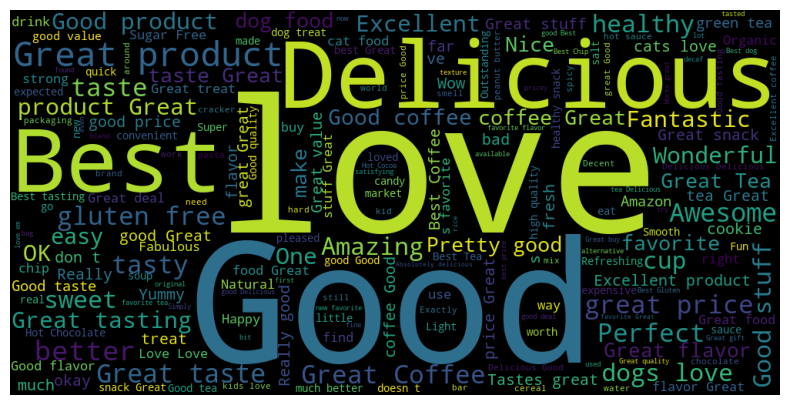

In [43]:
stopwords=set(STOPWORDS)
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Perform EDA for negative sentences

In [44]:
negative = data[data['polarity']<0]

In [46]:
texts = (' '.join(negative['Summary']))

In [47]:
texts[:2000]

'poor taste Nasty No flavor How can you go wrong! pretty expensive stale product. Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS! Tasteless but low calorie Marley\'s Mellow Mood Lite - Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK!!!! Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don\'t Waste Your Money Disappointed! sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee... Fantastic Chicken Noodle soup Heinz no more! Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping. poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad b

In [48]:
texts = re.sub('[^a-zA-Z]',' ',texts)

In [49]:
texts[:1000]

'poor taste Nasty No flavor How can you go wrong  pretty expensive stale product  Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS  Tasteless but low calorie Marley s Mellow Mood Lite   Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK     Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed  sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee    Fantastic Chicken Noodle soup Heinz no more  Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping  poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but

In [50]:
texts = re.sub(' +',' ',texts)

In [51]:
texts[:1000]

'poor taste Nasty No flavor How can you go wrong pretty expensive stale product Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS Tasteless but low calorie Marley s Mellow Mood Lite Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee Fantastic Chicken Noodle soup Heinz no more Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but a little hard 

(-0.5, 999.5, 499.5, -0.5)

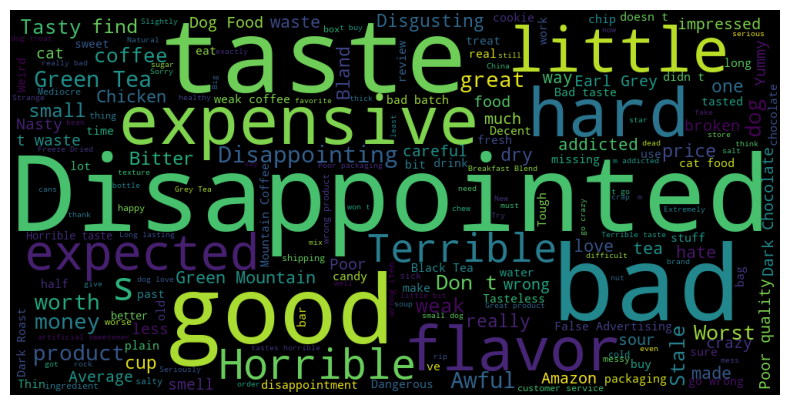

In [52]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(texts)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Analyse to what user Amazon can recommend more products

In [53]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [55]:
df['UserId'].shape

(568454,)

In [57]:
df['UserId'].nunique()

256059

In [60]:
raw = df.groupby(['UserId']).agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='Text',ascending=False)
raw

,Summary,Text,Score,ProductId
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
...,...,...,...,...
A2HROKQO0GA5AF,1,1,3.000000,1
A2HROR28DMJV2W,1,1,5.000000,1
A2HRR8CO2Y20G8,1,1,5.000000,1


In [61]:
raw.columns=['num_summary','num_text','avg_score','num_prod']

In [62]:
raw.head()

,num_summary,num_text,avg_score,num_prod
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256


In [63]:
raw_top10=raw[:10]

In [64]:
raw_top10

,num_summary,num_text,avg_score,num_prod
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
A1TMAVN4CEM8U8,204,204,4.833333,204
A2MUGFV2TDQ47K,201,201,3.751244,201
A3TVZM3ZIXG8YW,199,199,1.000000,199
A3PJZ8TU8FDQ1K,178,178,4.601124,178


In [75]:
x = raw_top10.index

In [76]:
height = raw_top10['num_prod']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

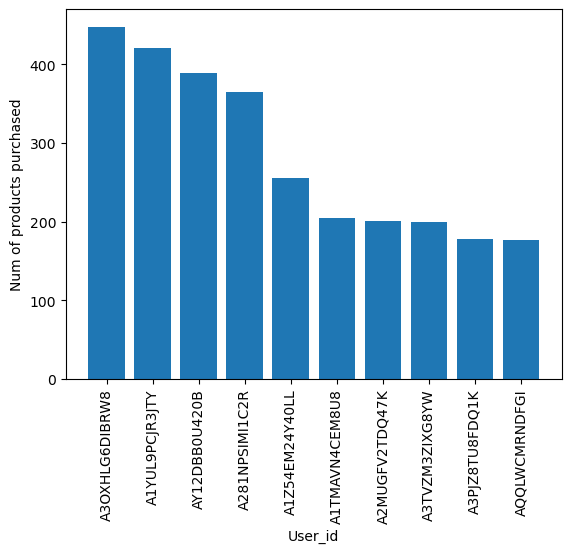

In [78]:
plt.bar(x,height)
plt.xlabel('User_id')
plt.ylabel('Num of products purchased')
plt.xticks(rotation = 'vertical')

In [145]:
# pick a random sample

samp = df.sample(n=2000)

In [146]:
samp.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29549,29550,B000PDY3P0,A9OMHKQ8ZRQP9,John Leaf,1,2,1,1341964800,Mouth burning,The popcorn pops great but after eating a few ...
204441,204442,B000ZGW6ZG,A328KG5KP61ZK8,Mike,0,0,5,1314835200,So delicious!!!! And good for you!!,These apricot bobo bars are so moist and delic...


# Check missing values in data

In [147]:
samp.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [148]:
samp.duplicated().sum()

0

In [149]:
samp = samp.reset_index(drop=True)

In [150]:
len(samp['Text'][0].split(' '))

31

In [151]:
def cal_len(st):
    return (len(st.split(' ')))

In [152]:
samp['text_len'] = samp['Text'].apply(cal_len)

In [153]:
samp.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_len
0,29550,B000PDY3P0,A9OMHKQ8ZRQP9,John Leaf,1,2,1,1341964800,Mouth burning,The popcorn pops great but after eating a few ...,31
1,204442,B000ZGW6ZG,A328KG5KP61ZK8,Mike,0,0,5,1314835200,So delicious!!!! And good for you!!,These apricot bobo bars are so moist and delic...,51


In [154]:
import plotly.express as px

In [155]:
px.box(samp,y='text_len')

Analyze score

C:\Users\panka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Score', ylabel='count'>

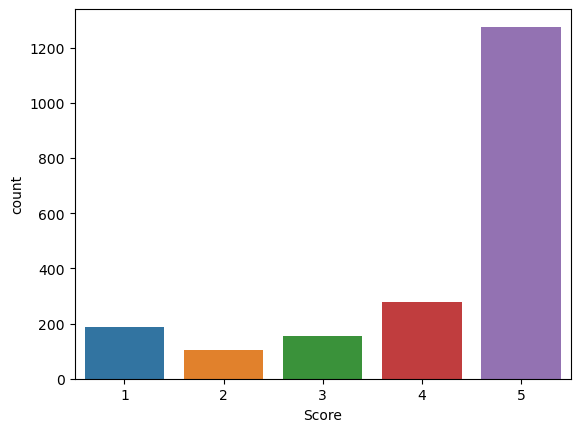

In [156]:
sns.countplot(samp['Score'])

# Text Pre-Processing

In [157]:
samp['Text'] = samp['Text'].str.lower()

In [159]:
samp['Text'][4]

'tazo chai organic spiced black tea is a blend of black tea, ginger, cinnamon, black pepper, cardamom, cloves and star anise. these items are all organically grown and this creates a sense of purity and clarity of thought.<br /><br />the tea has a delicious rich flavor and is perfectly blended for an ultimate chai experience. delicious when you add a packet of stevia and a swirling of orange blossom honey. milk powder makes this richer and a dash of cream makes it luxurious.<br /><br />while drinking this tea you are transported to india where chai wallahs sooth your soul with a cup of spicy tea. each cup of tazo tea is an adventure and this tea is especially delicious.<br /><br />~the rebecca review'

In [160]:
# remove punctuations:

def remove_punc(text):
    import string
    punc = string.punctuation
    no_punc=''
    for char in text:
        if char not in punc:
            no_punc = no_punc + char
    return no_punc

In [161]:
samp['Text'] = samp['Text'].apply(remove_punc)

In [162]:
samp['Text'][4]

'tazo chai organic spiced black tea is a blend of black tea ginger cinnamon black pepper cardamom cloves and star anise these items are all organically grown and this creates a sense of purity and clarity of thoughtbr br the tea has a delicious rich flavor and is perfectly blended for an ultimate chai experience delicious when you add a packet of stevia and a swirling of orange blossom honey milk powder makes this richer and a dash of cream makes it luxuriousbr br while drinking this tea you are transported to india where chai wallahs sooth your soul with a cup of spicy tea each cup of tazo tea is an adventure and this tea is especially deliciousbr br the rebecca review'

In [163]:
# Remove stopwords
from nltk.corpus import stopwords

In [166]:
rten = samp['Text'][4]

In [167]:
[word for word in rten.split(' ') if word not in set(stopwords.words('english'))]

['tazo',
 'chai',
 'organic',
 'spiced',
 'black',
 'tea',
 'blend',
 'black',
 'tea',
 'ginger',
 'cinnamon',
 'black',
 'pepper',
 'cardamom',
 'cloves',
 'star',
 'anise',
 'items',
 'organically',
 'grown',
 'creates',
 'sense',
 'purity',
 'clarity',
 'thoughtbr',
 'br',
 'tea',
 'delicious',
 'rich',
 'flavor',
 'perfectly',
 'blended',
 'ultimate',
 'chai',
 'experience',
 'delicious',
 'add',
 'packet',
 'stevia',
 'swirling',
 'orange',
 'blossom',
 'honey',
 'milk',
 'powder',
 'makes',
 'richer',
 'dash',
 'cream',
 'makes',
 'luxuriousbr',
 'br',
 'drinking',
 'tea',
 'transported',
 'india',
 'chai',
 'wallahs',
 'sooth',
 'soul',
 'cup',
 'spicy',
 'tea',
 'cup',
 'tazo',
 'tea',
 'adventure',
 'tea',
 'especially',
 'deliciousbr',
 'br',
 'rebecca',
 'review']

In [168]:
def remove_stopwords(review):
    re= [word for word in review.split(' ') if word not in set(stopwords.words('english'))]
    return ' '.join(re)

In [169]:
samp['Text'] = samp['Text'].apply(remove_stopwords)

In [170]:
samp['Text'][4]

'tazo chai organic spiced black tea blend black tea ginger cinnamon black pepper cardamom cloves star anise items organically grown creates sense purity clarity thoughtbr br tea delicious rich flavor perfectly blended ultimate chai experience delicious add packet stevia swirling orange blossom honey milk powder makes richer dash cream makes luxuriousbr br drinking tea transported india chai wallahs sooth soul cup spicy tea cup tazo tea adventure tea especially deliciousbr br rebecca review'

In [171]:
# check if url in text column or not

In [172]:
samp['Text'].str.contains('http').sum()

37

In [173]:
# remove urls

In [174]:
def remove_url(tex):
    url_pat = re.compile(r'href|http.\w+')
    return url_pat.sub(r'',tex)

In [175]:
samp['Text'] = samp['Text'].apply(remove_url)

In [177]:
samp['Text'][4]

'tazo chai organic spiced black tea blend black tea ginger cinnamon black pepper cardamom cloves star anise items organically grown creates sense purity clarity thoughtbr br tea delicious rich flavor perfectly blended ultimate chai experience delicious add packet stevia swirling orange blossom honey milk powder makes richer dash cream makes luxuriousbr br drinking tea transported india chai wallahs sooth soul cup spicy tea cup tazo tea adventure tea especially deliciousbr br rebecca review'

In [178]:
samp['Text'].str.contains('http').sum()

0

In [189]:
# remove 'br'

for i in range(len(samp['Text'])):
    samp['Text'][i] = samp['Text'][i].replace('br','')

C:\Users\panka\AppData\Local\Temp\ipykernel_21908\474217950.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [180]:
samp['Text'][4]

'tazo chai organic spiced black tea blend black tea ginger cinnamon black pepper cardamom cloves star anise items organically grown creates sense purity clarity thought  tea delicious rich flavor perfectly blended ultimate chai experience delicious add packet stevia swirling orange blossom honey milk powder makes richer dash cream makes luxurious  drinking tea transported india chai wallahs sooth soul cup spicy tea cup tazo tea adventure tea especially delicious  rebecca review'

In [190]:
data2 = samp.copy()

In [191]:
data2.shape

(2000, 11)

In [192]:
data2.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_len
0,29550,B000PDY3P0,A9OMHKQ8ZRQP9,John Leaf,1,2,1,1341964800,Mouth burning,popcorn pops great eating mouth fulls mouth st...,31
1,204442,B000ZGW6ZG,A328KG5KP61ZK8,Mike,0,0,5,1314835200,So delicious!!!! And good for you!!,apricot bobo bars moist delicious buy chocola...,51


In [183]:
from wordcloud import WordCloud, STOPWORDS 

In [184]:
stopwords = set(STOPWORDS)

In [193]:
comment = ' '.join(data2['Text'])

(-0.5, 399.5, 399.5, -0.5)

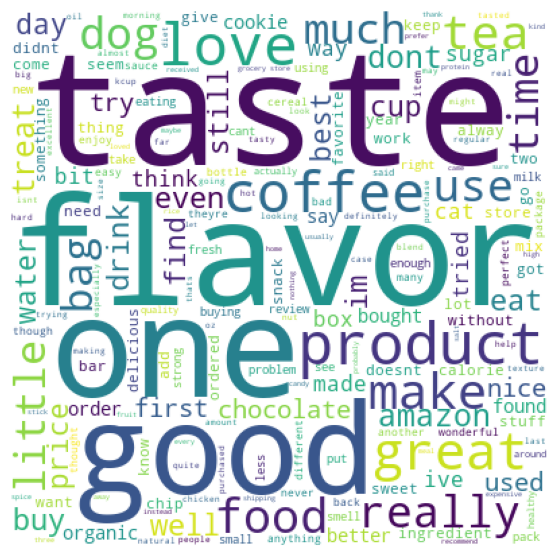

In [194]:
wordcloud = WordCloud(width=400, height=400, background_color ='white', stopwords=stopwords).generate(comment)
plt.figure(figsize=(7,7))
plt.imshow(wordcloud)
plt.axis('off')